### Here in this project I have cleaned and visualized the data set regarding to supply chain management. The problem statement is consisting of below questions.

1. List all the cities and the respective number of pending orders in 'India'?
2. Which country has the most suspected fraud?
3. Which product(s) has/have the maximum discount?
4. Which year had the minimum sales for "Nike" products?
5. How many successfully processed orders have days for shipping real (Real) > Days for shipment (Scheduled)?

### Then I have done feature selection process regarding to the correlations of each attribute. Then I decided to have 'Sales' attribute as my target attribute when training the module. Then I have done some operations in order to keep my dataset much suitable for the training process. The steps taken are mentioned below.

1. Removed attributes with less correlation with Sales
2. Removed outliers of some attributes without losing many rows
3. For the other skewed colums, used log transformation method with a skew_limit of 0.75

In [1]:
import pandas as pd

In [2]:
file = open('DataCoSupplyChainDataset.csv', encoding="ISO-8859-1")

In [3]:
df = pd.read_csv(file)

In [4]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [5]:
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
df.columns.tolist()

['Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Id',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Email',
 'Customer Fname',
 'Customer Id',
 'Customer Lname',
 'Customer Password',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Customer Zipcode',
 'Department Id',
 'Department Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order City',
 'Order Country',
 'Order Customer Id',
 'order date (DateOrders)',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order Region',
 'Order State',
 'Order Status',
 'Order Zipcode',
 'Product Card Id',
 'Product Category Id',
 'Product Description',
 'Product Image',
 'Product Name',
 'Product P

In [7]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [8]:
# We need to neglect the columns Zipcode and Description for sure

In [9]:
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

# Question 1 : List all the cities and the respective number of pending orders in 'India'?

In [10]:
df1 = df[df['Order Country'] == 'India']

In [11]:
df1['Order Status'].head(20)

1              PENDING
2               CLOSED
13            COMPLETE
14          PROCESSING
15            COMPLETE
17              CLOSED
18            COMPLETE
19     PENDING_PAYMENT
20          PROCESSING
21             PENDING
31            COMPLETE
32     PENDING_PAYMENT
36              CLOSED
45             PENDING
46             PENDING
48     PENDING_PAYMENT
54     PENDING_PAYMENT
236           COMPLETE
248           COMPLETE
262           COMPLETE
Name: Order Status, dtype: object

In [12]:
df2 = df1[['Order City', 'Order Item Quantity', 'Order Status']]

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4783 entries, 1 to 180518
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Order City           4783 non-null   object
 1   Order Item Quantity  4783 non-null   int64 
 2   Order Status         4783 non-null   object
dtypes: int64(1), object(2)
memory usage: 149.5+ KB


In [14]:
is_pending = df2['Order Status']=='PENDING'
df2 = df2[is_pending]
city_list = list(df2['Order City'].unique())
hh = {}

In [15]:
for city in city_list:
    df3 = df2.loc[df['Order City'] == city]
    hh[city] = df3['Order Item Quantity'].sum()

In [16]:
hh

{'Bikaner': 1,
 'Jabalpur': 24,
 'Bangalore': 48,
 'Pune': 44,
 'Jaipur': 19,
 'Ranchi': 10,
 'Durg': 6,
 'Patna': 9,
 'Faridabad': 25,
 'Fatehpur': 1,
 'Kota': 11,
 'Guwahati': 16,
 'Rohtak': 5,
 'Mumbai': 31,
 'Kulti': 15,
 'Imphal': 13,
 'Gorakhpur': 29,
 'Lucknow': 47,
 'Hubli': 1,
 'Nagpur': 23,
 'Ajmer': 36,
 'Amravati': 6,
 'Raipur': 16,
 'Thane': 3,
 'Dewas': 9,
 'Tirunelveli': 11,
 'Darbhanga': 15,
 'Aligarh': 8,
 'Saharanpur': 14,
 'Vadodara': 1,
 'Delhi': 39,
 'Bhopal': 1,
 'Jodhpur': 14,
 'Kanpur': 56,
 'Moradabad': 7,
 'Belgaum': 14,
 'Hyderabad': 33,
 'Nellore': 3,
 'Korba': 37,
 'Jamnagar': 1,
 'Puducherry': 7,
 'Srinagar': 7,
 'Satna': 11,
 'Muzaffarpur': 11,
 'Pimpri': 1,
 'Bokaro': 10,
 'Ludhiana': 2,
 'Jhansi': 4,
 'Amritsar': 10,
 'Malegaon': 4,
 'Nasik': 6,
 'Coimbatore': 13,
 'Agra': 15,
 'Durgapur': 22,
 'Chennai': 23,
 'Gulbarga': 1,
 'Brahmapur': 1,
 'Thiruvananthapuram': 3,
 'Bhavnagar': 3,
 'Ujjain': 7,
 'Surat': 13,
 'Ganganagar': 1,
 'Visakhapatnam': 34,
 '

# Question 2 : Which country has the most suspected fraud?

In [17]:
df4 = df.loc[df['Order Status'] == 'SUSPECTED_FRAUD']

In [18]:
suspect_list = dict(df4['Order Country'].value_counts())

In [19]:
maxkey = 0

In [20]:
for key in suspect_list.keys():
    if(suspect_list[key] > maxkey):
        max_item = key
        maxkey = suspect_list[key]
print(max_item)

Estados Unidos


# Question 3 : Which product(s) has/have the maximum discount?

In [21]:
df5 = df[['Order Item Discount','Product Name']]

In [22]:
prodlist = list(df5['Product Name'].unique())

In [23]:
maxdist = df5['Order Item Discount'].max()

In [24]:
maxdist

500.0

In [25]:
df6 = df[df['Order Item Discount'] == maxdist]

In [26]:
df6['Product Name']

12606    SOLE E35 Elliptical
Name: Product Name, dtype: object

# Question 5 : How many successfully processed orders have days for shipping real (Real) > Days for shipment (Scheduled)?

In [27]:
successfully_processed = df['Order Status'] == 'COMPLETE'
df7 = df[successfully_processed]

In [28]:
df7.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [29]:
desired = (df7['Days for shipping (real)'] > df7['Days for shipment (scheduled)'])

In [30]:
df7 = df7[desired]

In [31]:
df7.shape[0]

34199

# Question 4 : Which year had the minimum sales for "Nike" products?

In [32]:
df['Product Name'].unique()

array(['Smart watch ', 'Perfect Fitness Perfect Rip Deck',
       "Under Armour Girls' Toddler Spine Surge Runni",
       "Nike Men's Dri-FIT Victory Golf Polo",
       "Under Armour Men's Compression EV SL Slide",
       "Under Armour Women's Micro G Skulpt Running S",
       "Nike Men's Free 5.0+ Running Shoe",
       "Glove It Women's Mod Oval 3-Zip Carry All Gol",
       'Bridgestone e6 Straight Distance NFL San Dieg',
       "Columbia Men's PFG Anchor Tough T-Shirt",
       'Titleist Pro V1x Golf Balls',
       'Bridgestone e6 Straight Distance NFL Tennesse',
       'Polar FT4 Heart Rate Monitor', 'ENO Atlas Hammock Straps',
       "adidas Men's F10 Messi TRX FG Soccer Cleat",
       "Brooks Women's Ghost 6 Running Shoe",
       "Nike Men's CJ Elite 2 TD Football Cleat",
       "Diamondback Women's Serene Classic Comfort Bi",
       'Industrial consumer electronics', 'Web Camera', 'Dell Laptop',
       'SOLE E25 Elliptical', 'Elevation Training Mask 2.0',
       "adidas Men's Germ

In [33]:
min_sales_dict = {}

In [34]:
for x in range(2015, 2018):
    df8 = df[df['Product Name'].str.contains("Nike")]
    df8 = df8[['Product Name', 'order date (DateOrders)', 'Order Status', 'Sales']]
    year = str(x)
    df8 = df8[df8['order date (DateOrders)'].str.contains(year)]
    comp_pay = df8['Order Status'] == 'COMPLETE'
    df8 = df8[comp_pay]
    tot_sales = df8['Sales'].sum()
    min_sales_dict[year] = tot_sales

In [35]:
min_sales_dict

{'2015': 1181576.1537997602, '2016': 1203317.51526894, '2017': 893772.93088802}

In [36]:
min_sales = float('inf')

In [37]:
for key in min_sales_dict.keys():
    print(min_sales_dict[key])
    if (min_sales_dict[key] < min_sales):
        min_sales_year = key

1181576.1537997602
1203317.51526894
893772.93088802


In [38]:
min_sales_year

'2017'

# EDA

### Feature Selection

In [39]:
df.corr()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
Days for shipping (real),1.000000,0.515880,-0.005101,0.001757,0.401415,-0.000348,0.003432,0.000112,-0.001631,-0.004073,...,-0.000811,0.001962,0.001757,-0.005101,-0.000811,-0.000859,-0.000348,NaN,0.002185,NaN
Days for shipment (scheduled),0.515880,1.000000,-0.000185,0.006445,-0.369352,-0.000367,0.000899,-0.003019,-0.000262,-0.005300,...,-0.002925,0.006327,0.006445,-0.000185,0.005249,-0.000431,-0.000367,NaN,0.006912,NaN
Benefit per order,-0.005101,-0.000185,1.000000,0.133484,-0.003727,0.031889,0.009354,0.002235,0.031442,0.000338,...,0.015696,0.131816,0.133484,1.000000,-0.004978,0.033161,0.031889,NaN,0.103459,NaN
Sales per customer,0.001757,0.006445,0.133484,1.000000,-0.003791,0.225201,0.060181,-0.001304,0.232367,-0.000223,...,0.105413,0.989744,1.000000,0.133484,-0.000138,0.236367,0.225201,NaN,0.781781,NaN
Late_delivery_risk,0.401415,-0.369352,-0.003727,-0.003791,1.000000,0.001752,0.001484,0.003148,0.001077,0.000679,...,-0.000139,-0.003564,-0.003791,-0.003727,-0.014131,0.001490,0.001752,NaN,-0.002175,NaN
Category Id,-0.000348,-0.000367,0.031889,0.225201,0.001752,1.000000,0.274633,0.002898,0.888835,0.002195,...,-0.302408,0.227483,0.225201,0.031889,-0.005943,0.991092,1.000000,NaN,0.461059,NaN
Customer Id,0.003432,0.000899,0.009354,0.060181,0.001484,0.274633,1.000000,0.002022,0.136897,0.002335,...,-0.091328,0.060961,0.060181,0.009354,-0.005659,0.228039,0.274633,NaN,0.111118,NaN
Customer Zipcode,0.000112,-0.003019,0.002235,-0.001304,0.003148,0.002898,0.002022,1.000000,0.002878,0.584553,...,-0.006174,-0.001490,-0.001304,0.002235,0.011843,0.003173,0.002898,NaN,0.002191,NaN
Department Id,-0.001631,-0.000262,0.031442,0.232367,0.001077,0.888835,0.136897,0.002878,1.000000,0.002460,...,-0.265437,0.234718,0.232367,0.031442,-0.005982,0.906117,0.888835,NaN,0.446743,NaN
Latitude,-0.004073,-0.005300,0.000338,-0.000223,0.000679,0.002195,0.002335,0.584553,0.002460,1.000000,...,-0.001853,-0.000696,-0.000223,0.000338,-0.002921,0.002031,0.002195,NaN,0.000471,NaN


Looking at the correlations I can deterine that Sales column has more correlations with other attributes. So I will clean and analyse the data set in order to predict total sales for an order.

In [40]:
df.columns.tolist()

['Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Id',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Email',
 'Customer Fname',
 'Customer Id',
 'Customer Lname',
 'Customer Password',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Customer Zipcode',
 'Department Id',
 'Department Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order City',
 'Order Country',
 'Order Customer Id',
 'order date (DateOrders)',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order Region',
 'Order State',
 'Order Status',
 'Order Zipcode',
 'Product Card Id',
 'Product Category Id',
 'Product Description',
 'Product Image',
 'Product Name',
 'Product P

In [41]:
dff1 = df[['Benefit per order',
 'Sales per customer',
 'Category Id',
 'Department Id',
 'Department Name',
 'Market',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Product Price',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Card Id',
 'Product Name',
 'Product Price']]

In [42]:
dff1.isnull().sum()

Benefit per order           0
Sales per customer          0
Category Id                 0
Department Id               0
Department Name             0
Market                      0
Order Item Cardprod Id      0
Order Item Discount         0
Order Item Product Price    0
Order Item Quantity         0
Sales                       0
Order Item Total            0
Order Profit Per Order      0
Product Card Id             0
Product Name                0
Product Price               0
dtype: int64

### Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder

cat_cols = list(set(dff1.columns) - set((dff1.describe().columns)))

for col in cat_cols:
    le = LabelEncoder()
    dff1[col] = le.fit_transform(dff1[col])

<ipython-input-43-465eac8d2ec4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff1[col] = le.fit_transform(dff1[col])


In [44]:
dff1.head(10)

,Benefit per order,Sales per customer,Category Id,Department Id,Department Name,Market,Order Item Cardprod Id,Order Item Discount,Order Item Product Price,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Name,Product Price
0,91.250000,314.640015,73,2,4,3,1360,13.110000,327.75,1,327.75,314.640015,91.250000,1360,78,327.75
1,-249.089996,311.359985,73,2,4,3,1360,16.389999,327.75,1,327.75,311.359985,-249.089996,1360,78,327.75
2,-247.779999,309.720001,73,2,4,3,1360,18.030001,327.75,1,327.75,309.720001,-247.779999,1360,78,327.75
3,22.860001,304.809998,73,2,4,3,1360,22.940001,327.75,1,327.75,304.809998,22.860001,1360,78,327.75
4,134.210007,298.250000,73,2,4,3,1360,29.500000,327.75,1,327.75,298.250000,134.210007,1360,78,327.75
5,18.580000,294.980011,73,2,4,3,1360,32.779999,327.75,1,327.75,294.980011,18.580000,1360,78,327.75
6,95.180000,288.420013,73,2,4,3,1360,39.330002,327.75,1,327.75,288.420013,95.180000,1360,78,327.75
7,68.430000,285.140015,73,2,4,3,1360,42.610001,327.75,1,327.75,285.140015,68.430000,1360,78,327.75
8,133.720001,278.589996,73,2,4,3,1360,49.160000,327.75,1,327.75,278.589996,133.720001,1360,78,327.75
9,132.149994,275.309998,73,2,4,3,1360,52.439999,327.75,1,327.75,275.309998,132.149994,1360,78,327.75


In [45]:
dff1.corr()

,Benefit per order,Sales per customer,Category Id,Department Id,Department Name,Market,Order Item Cardprod Id,Order Item Discount,Order Item Product Price,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Name,Product Price
Benefit per order,1.000000,0.133484,0.031889,0.031442,0.006131,-0.005210,0.033161,0.064756,0.103459,0.015696,0.131816,0.133484,1.000000,0.033161,-0.055233,0.103459
Sales per customer,0.133484,1.000000,0.225201,0.232367,0.053196,-0.036071,0.236367,0.498734,0.781781,0.105413,0.989744,1.000000,0.133484,0.236367,-0.411655,0.781781
Category Id,0.031889,0.225201,1.000000,0.888835,0.168537,0.033876,0.991092,0.140180,0.461059,-0.302408,0.227483,0.225201,0.031889,0.991092,-0.306073,0.461059
Department Id,0.031442,0.232367,0.888835,1.000000,0.242868,0.007565,0.906117,0.144617,0.446743,-0.265437,0.234718,0.232367,0.031442,0.906117,-0.376000,0.446743
Department Name,0.006131,0.053196,0.168537,0.242868,1.000000,-0.007520,0.154659,0.033529,-0.038585,0.219187,0.053804,0.053196,0.006131,0.154659,0.061683,-0.038585
Market,-0.005210,-0.036071,0.033876,0.007565,-0.007520,1.000000,0.024199,-0.022884,-0.027677,-0.002521,-0.036507,-0.036071,-0.005210,0.024199,-0.001256,-0.027677
Order Item Cardprod Id,0.033161,0.236367,0.991092,0.906117,0.154659,0.024199,1.000000,0.147294,0.480288,-0.312555,0.238789,0.236367,0.033161,1.000000,-0.321745,0.480288
Order Item Discount,0.064756,0.498734,0.140180,0.144617,0.033529,-0.022884,0.147294,1.000000,0.488101,0.065379,0.617438,0.498734,0.064756,0.147294,-0.256587,0.488101
Order Item Product Price,0.103459,0.781781,0.461059,0.446743,-0.038585,-0.027677,0.480288,0.488101,1.000000,-0.476232,0.789948,0.781781,0.103459,0.480288,-0.575035,1.000000
Order Item Quantity,0.015696,0.105413,-0.302408,-0.265437,0.219187,-0.002521,-0.312555,0.065379,-0.476232,1.000000,0.106442,0.105413,0.015696,-0.312555,0.344655,-0.476232


In [95]:
dff1.describe()

,Benefit per order,Sales per customer,Category Id,Department Id,Department Name,Market,Order Item Cardprod Id,Order Item Discount,Order Item Product Price,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Name,Product Price
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,21.974989,183.107609,31.851451,5.443460,3.246201,2.107346,692.509764,20.664741,141.232550,2.127638,203.772096,183.107609,21.974989,692.509764,58.509049,141.232550
std,104.433526,120.043670,15.640064,1.629246,2.502709,1.150840,336.446807,21.800901,139.732492,1.453451,132.273077,120.043670,104.433526,336.446807,23.484701,139.732492
min,-4274.979980,7.490000,2.000000,2.000000,0.000000,0.000000,19.000000,0.000000,9.990000,1.000000,9.990000,7.490000,-4274.979980,19.000000,0.000000,9.990000
25%,7.000000,104.379997,18.000000,4.000000,0.000000,1.000000,403.000000,5.400000,50.000000,1.000000,119.980003,104.379997,7.000000,403.000000,56.000000,50.000000
50%,31.520000,163.990005,29.000000,5.000000,3.000000,2.000000,627.000000,14.000000,59.990002,1.000000,199.919998,163.990005,31.520000,627.000000,61.000000,59.990002
75%,64.800003,247.399994,45.000000,7.000000,6.000000,3.000000,1004.000000,29.990000,199.990005,3.000000,299.950012,247.399994,64.800003,1004.000000,71.000000,199.990005
max,911.799988,1939.989990,76.000000,12.000000,10.000000,4.000000,1363.000000,500.000000,1999.989990,5.000000,1999.989990,1939.989990,911.799988,1363.000000,117.000000,1999.989990


### Removing Outliers

In [96]:
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<AxesSubplot:>

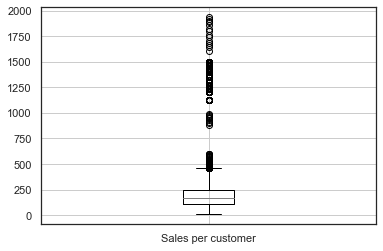

In [97]:
dff1.boxplot(['Sales per customer'])

In [98]:
dff2 = dff1[dff1['Sales per customer'] < 400]

<AxesSubplot:>

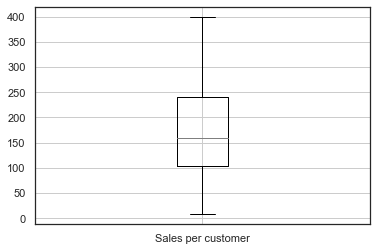

In [99]:
dff2.boxplot(['Sales per customer'])

<AxesSubplot:>

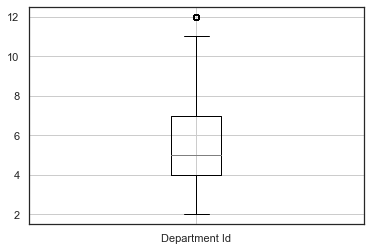

In [100]:
dff2.boxplot(['Department Id'])

In [101]:
dff2 = dff2[dff2['Department Id'] < 10]

<AxesSubplot:>

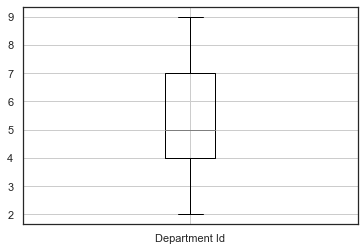

In [102]:
dff2.boxplot(['Department Id'])

<AxesSubplot:>

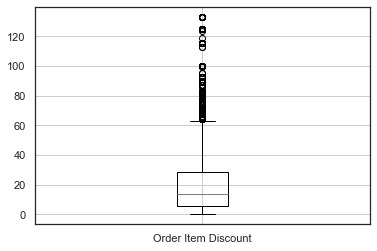

In [103]:
dff2.boxplot(['Order Item Discount'])

In [104]:
dff2

,Benefit per order,Sales per customer,Category Id,Department Id,Department Name,Market,Order Item Cardprod Id,Order Item Discount,Order Item Product Price,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Name,Product Price
0,91.250000,314.640015,73,2,4,3,1360,13.110000,327.750000,1,327.750000,314.640015,91.250000,1360,78,327.750000
1,-249.089996,311.359985,73,2,4,3,1360,16.389999,327.750000,1,327.750000,311.359985,-249.089996,1360,78,327.750000
2,-247.779999,309.720001,73,2,4,3,1360,18.030001,327.750000,1,327.750000,309.720001,-247.779999,1360,78,327.750000
3,22.860001,304.809998,73,2,4,3,1360,22.940001,327.750000,1,327.750000,304.809998,22.860001,1360,78,327.750000
4,134.210007,298.250000,73,2,4,3,1360,29.500000,327.750000,1,327.750000,298.250000,134.210007,1360,78,327.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,40.000000,399.980011,45,7,3,3,1004,0.000000,399.980011,1,399.980011,399.980011,40.000000,1004,24,399.980011
180515,-613.770019,395.980011,45,7,3,3,1004,4.000000,399.980011,1,399.980011,395.980011,-613.770019,1004,24,399.980011
180516,141.110001,391.980011,45,7,3,3,1004,8.000000,399.980011,1,399.980011,391.980011,141.110001,1004,24,399.980011
180517,186.229996,387.980011,45,7,3,3,1004,12.000000,399.980011,1,399.980011,387.980011,186.229996,1004,24,399.980011


## Visualizing Data

<AxesSubplot:xlabel='Product Price', ylabel='Sales'>

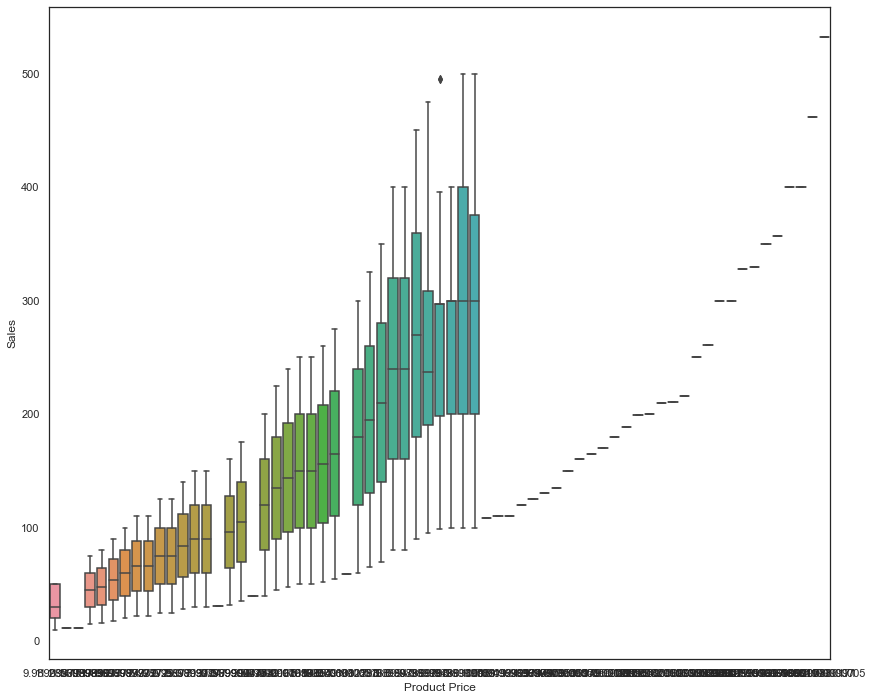

In [105]:
plt.rcParams['figure.figsize'] = 14,12
sb.set_style('white')
sb.set_context('notebook')
sb.set_palette('dark')

sb.boxplot(x=dff2['Product Price'], y=dff2['Sales'])

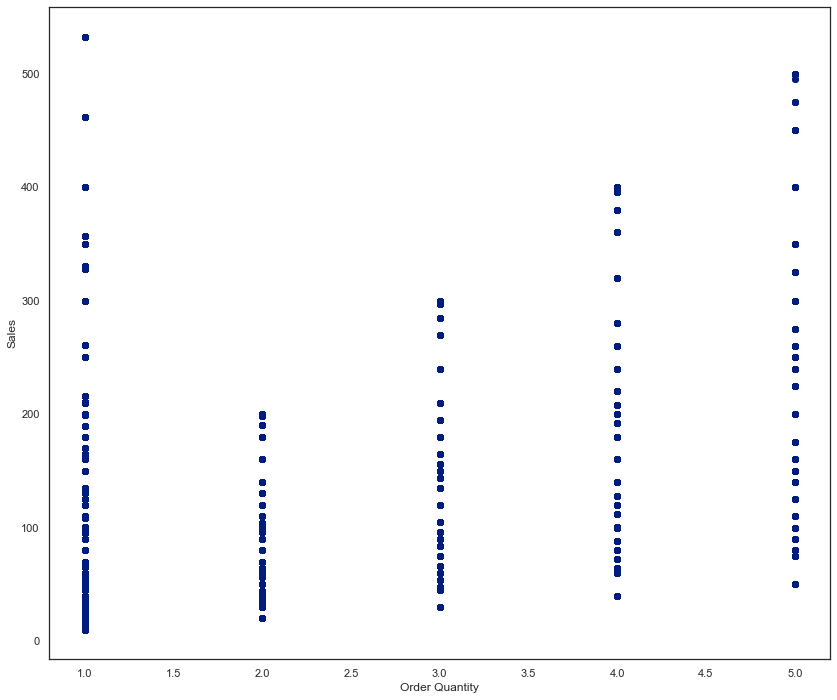

In [106]:
plt.scatter(dff2['Order Item Quantity'], dff2['Sales'])
plt.xlabel('Order Quantity')
plt.ylabel('Sales')
plt.show()

## Feature Engineering

### Log Transformation

In [107]:
import numpy as np
from numpy import log, log1p
from scipy.stats import boxcox

D:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Order Item Discount', ylabel='Density'>

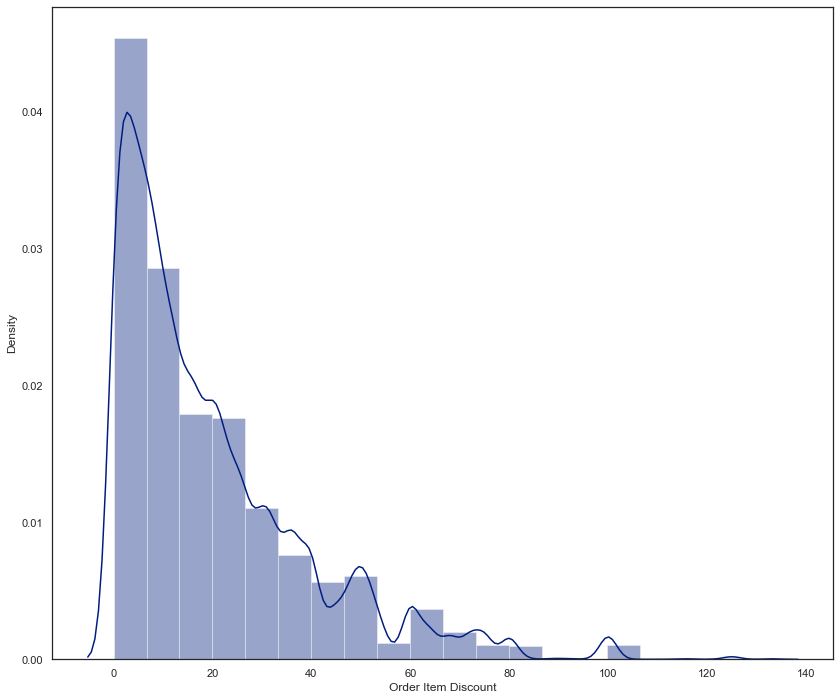

In [108]:
sb.distplot(dff2['Order Item Discount'], bins=20)

This is a right-positive skewed dataset

<AxesSubplot:>

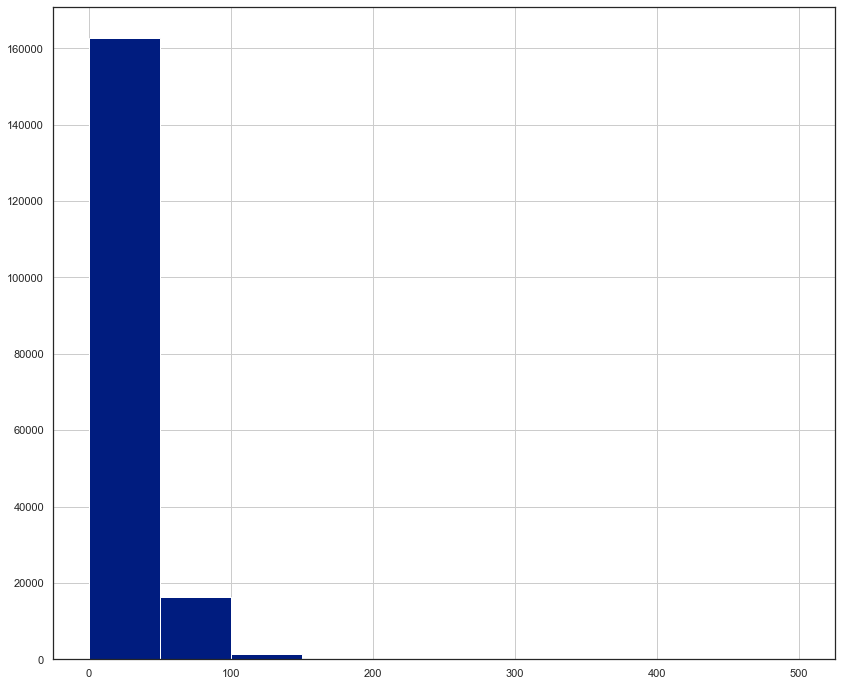

In [109]:
field = "Order Item Discount"
df[field].hist()

<AxesSubplot:>

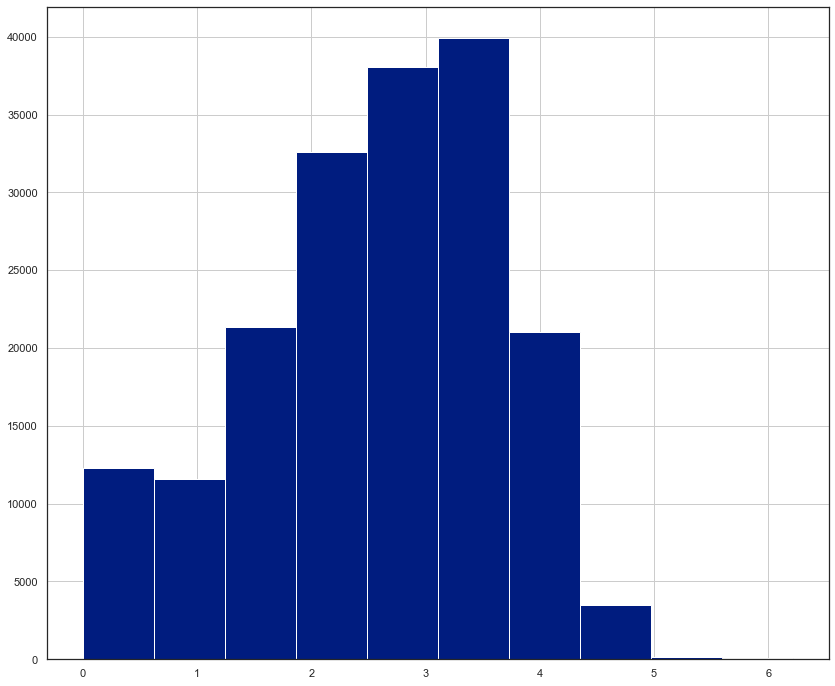

In [110]:
df[field].apply(np.log1p).hist()

### Performing Skew Transformation

In [111]:
dff2[field] = dff2[field].apply(np.log1p)

In [112]:
dff2.describe()

,Benefit per order,Sales per customer,Category Id,Department Id,Department Name,Market,Order Item Cardprod Id,Order Item Discount,Order Item Product Price,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Name,Product Price
count,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000
mean,20.933513,174.383048,31.532595,5.408733,3.134856,2.108548,687.303870,2.541362,134.989130,2.110181,194.227839,174.383048,20.933513,687.303870,58.691041,134.989130
std,94.389234,97.461774,14.967768,1.517754,2.411444,1.153347,325.092396,1.112440,118.503180,1.430646,107.481790,97.461774,94.389234,325.092396,23.266404,118.503180
min,-1088.949951,7.490000,2.000000,2.000000,0.000000,0.000000,19.000000,0.000000,9.990000,1.000000,9.990000,7.490000,-1088.949951,19.000000,1.000000,9.990000
25%,6.830000,103.989998,18.000000,4.000000,0.000000,1.000000,403.000000,1.856298,50.000000,1.000000,119.980003,103.989998,6.830000,403.000000,56.000000,50.000000
50%,30.840000,159.990005,29.000000,5.000000,3.000000,2.000000,627.000000,2.707383,59.990002,1.000000,179.970001,159.990005,30.840000,627.000000,61.000000,59.990002
75%,63.000000,239.979996,45.000000,7.000000,5.000000,3.000000,1004.000000,3.394508,199.990005,3.000000,260.649994,239.979996,63.000000,1004.000000,71.000000,199.990005
max,199.990005,399.989990,76.000000,9.000000,8.000000,4.000000,1363.000000,4.898959,532.580017,5.000000,532.580017,399.989990,199.990005,1363.000000,117.000000,532.580017


## It shows that the sckewness has been removed in the field we considered. Let us do the same for every skewed columns.

In [113]:
dff2 = dff2.select_dtypes('number')

In [114]:
num_cols = dff2.select_dtypes('number').columns

In [115]:
skew_limit = 0.75

In [116]:
skew_vals = dff2[num_cols].skew()
skew_vals

Benefit per order          -3.496892
Sales per customer          0.572096
Category Id                 0.311214
Department Id              -0.057563
Department Name             0.167246
Market                      0.101203
Order Item Cardprod Id      0.104916
Order Item Discount        -0.543592
Order Item Product Price    1.190206
Order Item Quantity         0.890882
Sales                       0.539735
Order Item Total            0.572096
Order Profit Per Order     -3.496892
Product Card Id             0.104916
Product Name               -0.194488
Product Price               1.190206
dtype: float64

### Here are the skewed columns in the given skew limit 0.75

Let us select the most skewed columns out of them(filtering and ordering)

In [117]:
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending=False)
skew_cols 

Product Price               1.190206
Order Item Product Price    1.190206
Order Item Quantity         0.890882
Order Profit Per Order     -3.496892
Benefit per order          -3.496892
dtype: float64

In [118]:
skew_cols = ['Product Price', 'Order Item Product Price', 'Order Item Quantity']

For those columns we apply log transformation

In [119]:
for col in skew_cols:
    dff2[col] = dff2[col].apply(np.log1p)

In [120]:
dff2.describe()

,Benefit per order,Sales per customer,Category Id,Department Id,Department Name,Market,Order Item Cardprod Id,Order Item Discount,Order Item Product Price,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Name,Product Price
count,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000
mean,20.933513,174.383048,31.532595,5.408733,3.134856,2.108548,687.303870,2.541362,4.561430,1.040684,194.227839,174.383048,20.933513,687.303870,58.691041,4.561430
std,94.389234,97.461774,14.967768,1.517754,2.411444,1.153347,325.092396,1.112440,0.831922,0.419935,107.481790,97.461774,94.389234,325.092396,23.266404,0.831922
min,-1088.949951,7.490000,2.000000,2.000000,0.000000,0.000000,19.000000,0.000000,2.396986,0.693147,9.990000,7.490000,-1088.949951,19.000000,1.000000,2.396986
25%,6.830000,103.989998,18.000000,4.000000,0.000000,1.000000,403.000000,1.856298,3.931826,0.693147,119.980003,103.989998,6.830000,403.000000,56.000000,3.931826
50%,30.840000,159.990005,29.000000,5.000000,3.000000,2.000000,627.000000,2.707383,4.110710,0.693147,179.970001,159.990005,30.840000,627.000000,61.000000,4.110710
75%,63.000000,239.979996,45.000000,7.000000,5.000000,3.000000,1004.000000,3.394508,5.303255,1.386294,260.649994,239.979996,63.000000,1004.000000,71.000000,5.303255
max,199.990005,399.989990,76.000000,9.000000,8.000000,4.000000,1363.000000,4.898959,6.279609,1.791759,532.580017,399.989990,199.990005,1363.000000,117.000000,6.279609


Now the dataset is ready to train!